### This notebook is created for ds assessment Level 3 by Random Walk AI and written by [Avinash Changrani](https://github.com/nabobery/)


In [1]:
# importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reading the required csv files and storing in dataframe
books_df = pd.read_csv('books.csv')
book_tags_df = pd.read_csv('book_tags.csv')
ratings_df = pd.read_csv('ratings.csv')

In [3]:
# printing the first 5 rows to see how the df looks like
books_df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0


In [4]:
book_tags_df.head()

,goodreads_book_id,tag_id,count
0,386,30574,565
1,386,19733,280
2,386,21689,182
3,386,21773,99
4,386,19742,78


In [5]:
ratings_df.head()

,user_id,book_id,rating
0,8,2584,5
1,4,87,5
2,4,495,4
3,9,344,4
4,9,372,4


Question 1: How many books do not have an original title [books.csv]?

In [6]:
# printing the count of dfs that have original title as null
missing_titles_count = books_df['original_title'].isnull().sum()
print(f"Number of books without an original title: {missing_titles_count}")

Number of books without an original title: 36


Question 2: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing records containing null values for original_title column in [books.csv] and corresponding records in [book_tags.csv] and [ratings.csv]


In [7]:
# clean the dataset by removing null original title rows
books_df_cleaned = books_df.dropna(subset=['original_title'])

# store the removed book ids and goodread_book_ids
removed_book_ids = set(books_df['book_id']) - set(books_df_cleaned['book_id'])
removed_goodreads_book_id = set(books_df['goodreads_book_id']) - set(books_df_cleaned['goodreads_book_id'])

# remove from the other dataframes based on that 
book_tags_df_cleaned = book_tags_df[~book_tags_df['goodreads_book_id'].isin(removed_goodreads_book_id)]
ratings_df_cleaned = ratings_df[ratings_df['book_id'].isin(removed_book_ids)]

# unique books count from the cleaned book df
unique_books_count = books_df_cleaned['book_id'].nunique()
print(f"Number of unique books in the dataset: {unique_books_count}")

Number of unique books in the dataset: 363


Question 3: How many unique users are present in the dataset [ratings.csv]?

In [8]:
# unique users count from the cleaned ratings df
unique_users_count = ratings_df_cleaned['user_id'].nunique()
print(f"Number of unique users in the dataset: {unique_users_count}")

Number of unique users in the dataset: 6086


Question 4: How many unique tags are there in the dataset [book_tags.csv]?

In [9]:
# unique tags count from the cleaned book tags df
unique_tags_count = book_tags_df_cleaned['tag_id'].nunique()
print(f"Number of unique tags in the dataset: {unique_tags_count}")

Number of unique tags in the dataset: 3459


Question 5: Which tag_id is the most frequently used ie. mapped with the highest number of books [book_tags.csv] ? (In case of more than one tag, mention the tag id with the least numerical value)

In [10]:
# get the tag id frequencies
tag_id_frequencies = book_tags_df_cleaned['tag_id'].value_counts()

print(tag_id_frequencies)

4600     366
21689    365
30574    364
4605     364
21773    363
        ... 
678        1
16837      1
284        1
674        1
25370      1
Name: tag_id, Length: 3459, dtype: int64


In [11]:
# as we see that there's no tie breaking, we just return the tag id with highest frequency
# else we get all the tag ids with the most frequency and sort them to get the least tag id 
most_frequent_tag_id = tag_id_frequencies.idxmax()
print(f"Tag_id with the most frequent usage: {most_frequent_tag_id}")

Tag_id with the most frequent usage: 4600


Question 6: Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv] 

In [12]:
# we merge the pdf so that we can have one df which has title and tagid to count mapping
merged_df = pd.merge(book_tags_df_cleaned, books_df_cleaned, on='goodreads_book_id')

merged_df.head()

,goodreads_book_id,tag_id,count,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,386,30574,565,9759,386,3328037,22,393329402,9.780393e+12,Nick Flynn,...,8963,909,221,718,2302,3340,2382,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,0
1,386,19733,280,9759,386,3328037,22,393329402,9.780393e+12,Nick Flynn,...,8963,909,221,718,2302,3340,2382,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,0
2,386,21689,182,9759,386,3328037,22,393329402,9.780393e+12,Nick Flynn,...,8963,909,221,718,2302,3340,2382,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,0
3,386,21773,99,9759,386,3328037,22,393329402,9.780393e+12,Nick Flynn,...,8963,909,221,718,2302,3340,2382,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,0
4,386,19742,78,9759,386,3328037,22,393329402,9.780393e+12,Nick Flynn,...,8963,909,221,718,2302,3340,2382,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,0


In [13]:
# Now, we can get the mosttagged book title by just grouping by title and counting number of tags for each title and findind the max frequency tags book title
most_tagged_book_title = merged_df.groupby('title')['tag_id'].count().idxmax()
print(f"Book with the most number of counts of tags: {most_tagged_book_title}")

Book with the most number of counts of tags: 'Tis (Frank McCourt, #2)


Question 7: Plot a bar chart with top 20 unique tags in descending order of ‘user records’ (the number of users tagged the given tag_id with the goodreads_book_id) [book_tags.csv]

In [14]:
# tag to user records count df
tag_user_records = book_tags_df_cleaned.groupby('tag_id')['count'].sum()

tag_user_records

tag_id
0         7
1         3
9         3
13        3
107      40
         ..
33933     9
33984    10
34057     8
34155    16
34239     5
Name: count, Length: 3459, dtype: int64

In [15]:
# top 20 user records tags 
top_tags = tag_user_records.sort_values(ascending=False).head(20)
print(f"Top 20 unique tags based on user records: \n{top_tags}")

Top 20 unique tags based on user records: 
tag_id
30574    8343949
8717      363383
21689     265047
19733     125218
4605      119172
21773     113736
11557     100763
14552      61107
19742      48587
4949       41026
15048      37147
5207       30519
22743      28545
3611       26352
7457       25986
4594       25449
4615       24706
3389       22850
11743      21226
3392       19755
Name: count, dtype: int64


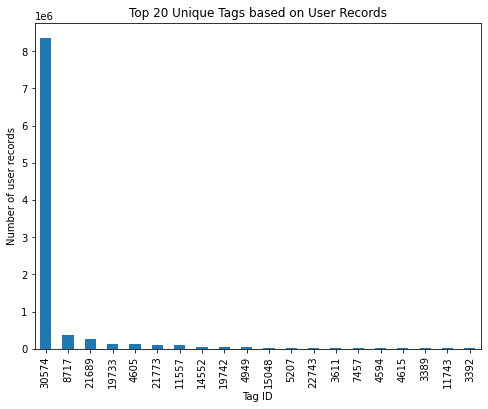

In [16]:
# plotting the bar chat 
top_tags.plot(kind='bar', figsize=(8, 6))
plt.title('Top 20 Unique Tags based on User Records')
plt.xlabel('Tag ID')
plt.ylabel('Number of user records')
plt.show()

### Thank you